In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('raw_house_data.csv')
df.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",NaN
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55


In [3]:
#Selected features
selected_features = ['sold_price', 'taxes', 'longitude', 'latitude',
                    'lot_acres', 'year_built', 'bedrooms', 'bathrooms',
                    'sqrt_ft', 'garage', 'zipcode', 'fireplaces', 'HOA']
data=df[selected_features]
data.head()

,sold_price,taxes,longitude,latitude,lot_acres,year_built,bedrooms,bathrooms,sqrt_ft,garage,zipcode,fireplaces,HOA
0,5300000.0,5272.00,-110.378200,31.356362,2154.00,1941,13,10.0,10500.0,0.0,85637,6,0
1,4200000.0,10422.36,-111.045371,31.594213,1707.00,1997,2,2.0,7300.0,0.0,85646,5,0
2,4200000.0,10482.00,-111.040707,31.594844,1707.00,1997,2,3.0,NaN,NaN,85646,5,NaN
3,4500000.0,8418.58,-111.035925,31.645878,636.67,1930,7,5.0,9019.0,4.0,85646,4,NaN
4,3411450.0,15393.00,-110.813768,32.285162,3.21,1995,4,6.0,6396.0,3.0,85750,5,55


In [4]:
data.dtypes

,0
sold_price,float64
taxes,float64
longitude,float64
latitude,float64
lot_acres,float64
year_built,int64
bedrooms,int64
bathrooms,float64
sqrt_ft,float64
garage,float64


In [5]:
# Convert fireplaces and HOA to a numeric type
columns_to_convert = ['fireplaces', 'HOA']
for col in columns_to_convert:
  data[col] = pd.to_numeric(data[col],errors='coerce')
data.dtypes

<ipython-input-5-b9ebd25a474b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = pd.to_numeric(data[col],errors='coerce')


,0
sold_price,float64
taxes,float64
longitude,float64
latitude,float64
lot_acres,float64
year_built,int64
bedrooms,int64
bathrooms,float64
sqrt_ft,float64
garage,float64


In [6]:
data.isnull().sum().sort_values(ascending=False)

,0
HOA,580
sqrt_ft,56
fireplaces,25
lot_acres,10
garage,7
bathrooms,6
sold_price,0
taxes,0
longitude,0
latitude,0


In [7]:
# Impute 'HOA' with the mode (most frequent value)
data['HOA'].fillna(data['HOA'].mode()[0], inplace=True)

# Impute 'sqrt_ft' with the median value
data['sqrt_ft'].fillna(data['sqrt_ft'].median(), inplace=True)

# Impute 'fireplaces' with the median value
data['fireplaces'].fillna(data['fireplaces'].median(), inplace=True)

# Impute 'lot_acres' with the median value
data['lot_acres'].fillna(data['lot_acres'].median(), inplace=True)

# Impute 'garage' with the median value
data['garage'].fillna(data['garage'].median(), inplace=True)

# Impute 'bathrooms' with the median value
data['bathrooms'].fillna(data['bathrooms'].median(), inplace=True)

<ipython-input-7-9da7acd7ae5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['HOA'].fillna(data['HOA'].mode()[0], inplace=True)
<ipython-input-7-9da7acd7ae5d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sqrt_ft'].fillna(data['sqrt_ft'].median(), inplace=True)
<ipython-input-7-9da7acd7ae5d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fireplaces'].fillna(data['fireplaces'].median(), inplace=True)
<ipython-in

In [8]:
data.isnull().sum()

,0
sold_price,0
taxes,0
longitude,0
latitude,0
lot_acres,0
year_built,0
bedrooms,0
bathrooms,0
sqrt_ft,0
garage,0


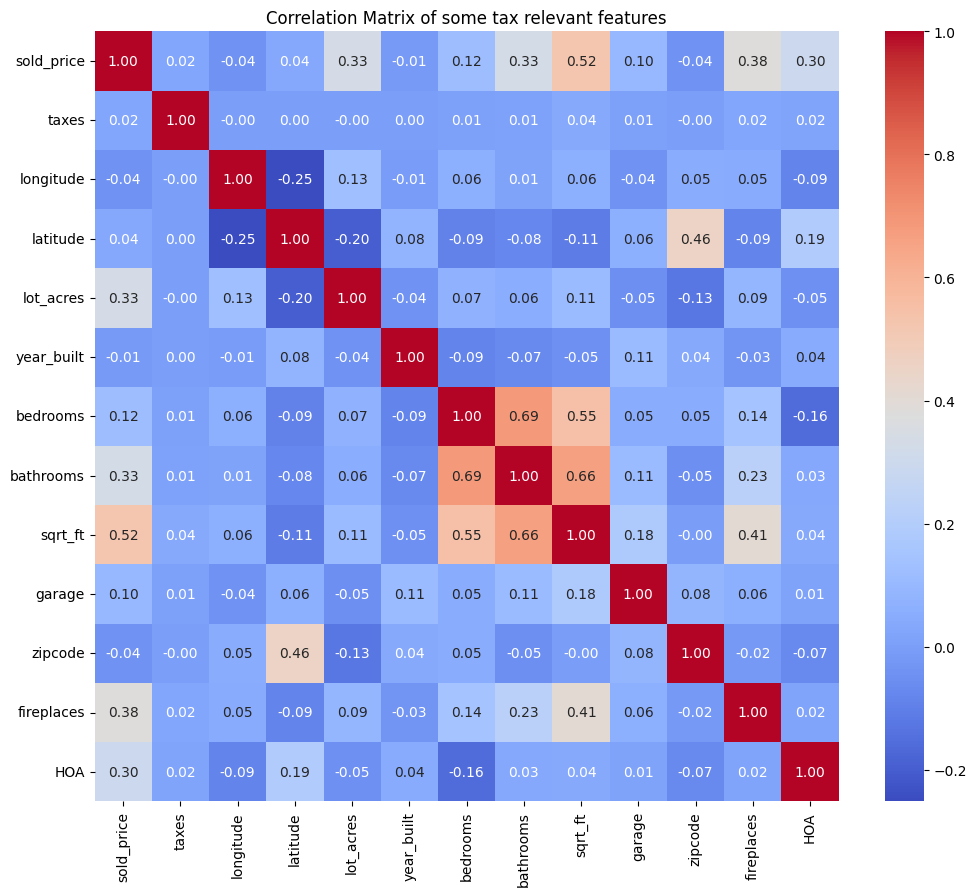

In [9]:
# Compute correlation matrix
correlation_matrix = data.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of some tax relevant features')
plt.show()

In [10]:
#check the skewness
data.skew()

,0
sold_price,3.794414
taxes,70.366938
longitude,1.828119
latitude,0.112518
lot_acres,31.453657
year_built,-28.202745
bedrooms,11.341422
bathrooms,10.181725
sqrt_ft,3.548490
garage,4.952909


In [11]:
#Data transformation by log
selected_features = ['sold_price', 'taxes',
                     'lot_acres', 'year_built', 'bedrooms', 'bathrooms',
                     'sqrt_ft', 'garage', 'HOA']

# Check for the presence of negative values
for feature in selected_features:
    if data[feature].min() < 0:
        print(f"Feature {feature} contains negative values; log1p transformation may not be appropriate.")

# Apply log1p transformation to selected features and create a new DataFrame
data_transformed = data.copy()
for feature in selected_features:
    if data[feature].min() >= 0:  # Only apply transformation to non-negative values
        data_transformed[feature] = np.log1p(data[feature])
    else:
        print(f"Skipping log1p transformation for feature {feature} due to negative values.")

# Check the result
data_transformed.head()

,sold_price,taxes,longitude,latitude,lot_acres,year_built,bedrooms,bathrooms,sqrt_ft,garage,zipcode,fireplaces,HOA
0,15.483218,8.570355,-110.378200,31.356362,7.675546,7.571474,2.639057,2.397895,9.259226,0.000000,85637,6.0,0.000000
1,15.250595,9.251805,-111.045371,31.594213,7.443078,7.599902,1.098612,1.098612,8.895767,0.000000,85646,5.0,0.000000
2,15.250595,9.257510,-111.040707,31.594844,7.443078,7.599902,1.098612,1.386294,8.164226,1.386294,85646,5.0,0.000000
3,15.319588,9.038315,-111.035925,31.645878,6.457821,7.565793,2.079442,1.791759,9.107200,1.609438,85646,4.0,0.000000
4,15.042648,9.641733,-110.813768,32.285162,1.437463,7.598900,1.609438,1.945910,8.763584,1.386294,85750,5.0,4.025352


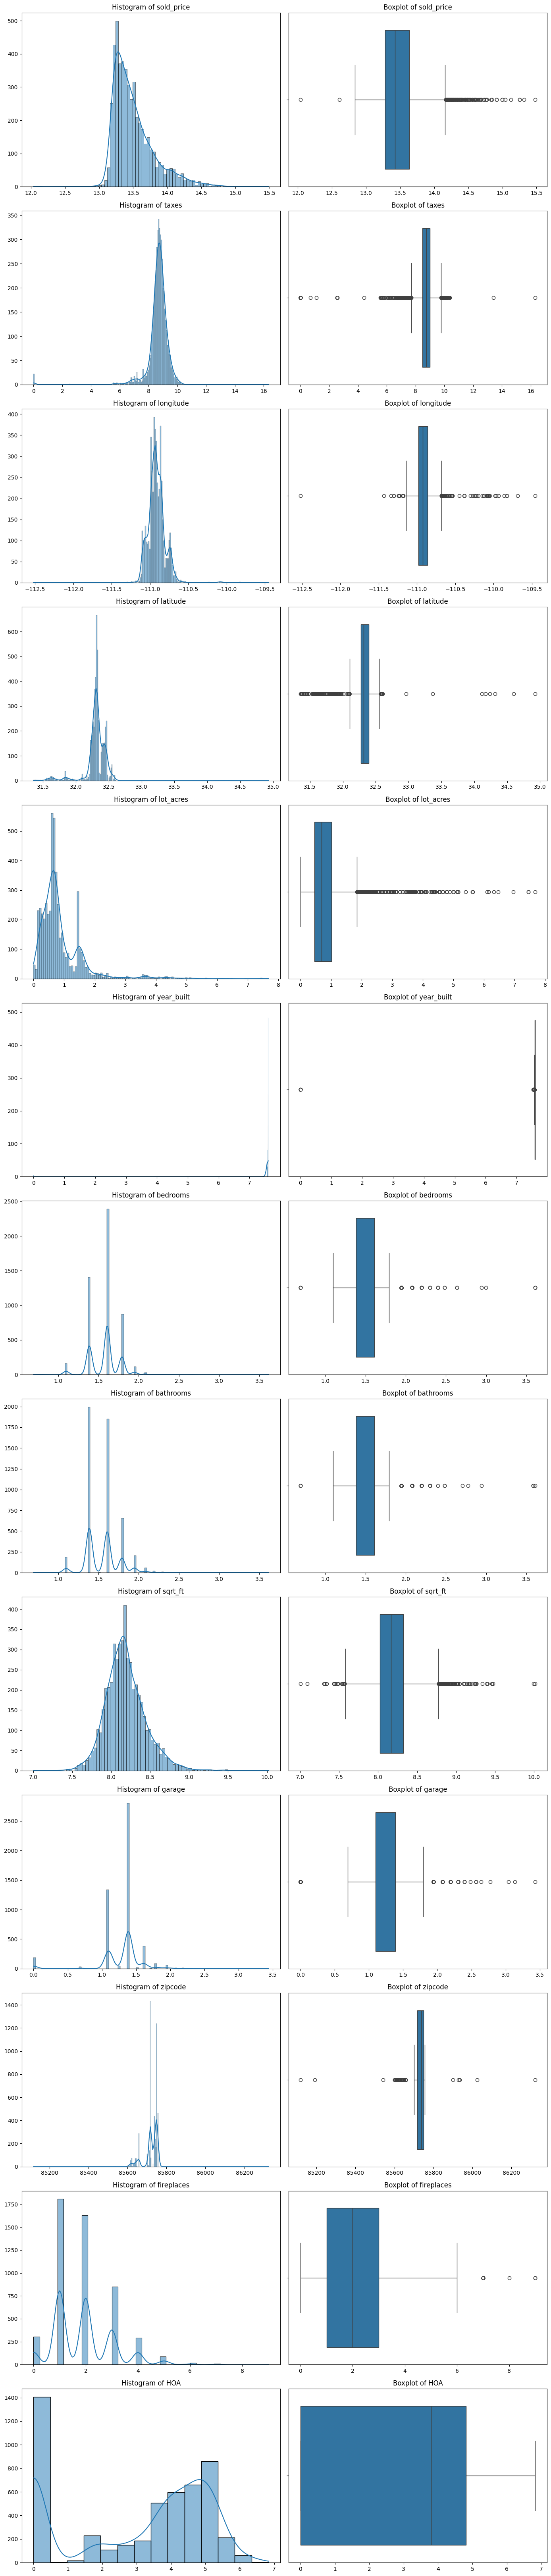

In [13]:
#Checking outliers and skewness
from scipy.stats import skew

def plot_skewness(data, columns):
    """
    Plots histograms and box plots to visualize skewness
    """
    num_features = len(columns)
    fig, axes = plt.subplots(num_features, 2, figsize=(14, 5 * num_features))

    for i, column in enumerate(columns):
        # Plot histogram
        sns.histplot(data_transformed[column], kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'Histogram of {column}')
        axes[i, 0].set_xlabel('')
        axes[i, 0].set_ylabel('')

        # Plot boxplot
        sns.boxplot(x=data_transformed[column], ax=axes[i, 1])
        axes[i, 1].set_title(f'Boxplot of {column}')
        axes[i, 1].set_xlabel('')
        axes[i, 1].set_ylabel('')

        # # Print skewness value
        # skewness = skew(data[column].dropna())
        # print(f'Skewness of {column}: {skewness:.2f}')

    plt.tight_layout()
    plt.show()

# List of columns to check
columns_to_check = ['sold_price', 'taxes', 'longitude', 'latitude', 'lot_acres',
                    'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
                    'zipcode', 'fireplaces', 'HOA']
plot_skewness(data_transformed, columns_to_check)


In [14]:
#checking outliers

def detect_outliers_iqr(df, features):
    outliers = {}
    for feature in features:
        Q1 = data_transformed[feature].quantile(0.25)
        Q3 = data_transformed[feature].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outlier_indices = data_transformed[(data_transformed[feature] < lower_bound) | (data_transformed[feature] > upper_bound)].index
        outliers[feature] = outlier_indices

    return outliers

def display_outliers(df, outliers):
    # Combine all outlier indices into a single set to avoid duplicates
    all_outlier_indices = set()
    for indices in outliers.values():
        all_outlier_indices.update(indices)

    # Display rows corresponding to the outliers
    outlier_rows = data_transformed.loc[list(all_outlier_indices)]
    return outlier_rows

# Define the features to check for outliers
features = ['sold_price', 'taxes', 'longitude', 'latitude', 'lot_acres',
            'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
            'zipcode', 'fireplaces', 'HOA']

# Detect outliers
outliers = detect_outliers_iqr(data_transformed, features)

# Display outliers
outlier_rows = display_outliers(data_transformed, outliers)
print("Rows corresponding to outliers:")
outlier_rows.shape

Rows corresponding to outliers:


(1633, 13)

In [15]:
def remove_outliers(df, outliers):
    # Combine all outlier indices into a single set to avoid duplicates
    all_outlier_indices = set()
    for indices in outliers.values():
        all_outlier_indices.update(indices)

    # Remove outliers from the DataFrame
    df_cleaned = data_transformed.drop(index=all_outlier_indices, errors='ignore')
    return df_cleaned

# Handle outliers by removing them
data_cleaned = remove_outliers(data_transformed, outliers)

# Verify the result
print("Data before removing outliers:")
print(data_transformed.shape)
print("Data after removing outliers:")
print(data_cleaned.shape)

Data before removing outliers:
(5000, 13)
Data after removing outliers:
(3367, 13)


In [16]:
def manual_normalization(df, features):
    df_normalized = data_cleaned.copy()
    for feature in features:
        min_value = data_cleaned[feature].min()
        max_value = data_cleaned[feature].max()

        # Apply normalization formula
        df_normalized[feature] = (data_cleaned[feature] - min_value) / (max_value - min_value)

    return df_normalized

# Define the features to normalize
features = ['sold_price', 'taxes', 'longitude', 'latitude', 'lot_acres',
            'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
            'zipcode', 'fireplaces', 'HOA']

# Apply manual normalization
data_normalized = manual_normalization(data_cleaned, features)

# Display the first few rows of the normalized dataset
print("Normalized dataset:")
data_normalized.head()


Normalized dataset:


,sold_price,taxes,longitude,latitude,lot_acres,year_built,bedrooms,bathrooms,sqrt_ft,garage,zipcode,fireplaces,HOA
85,1.000000,0.597305,0.735315,0.392036,0.151234,0.670006,0.415037,0.736966,0.375276,0.36907,0.907407,0.166667,0.000000
191,0.936408,0.558522,0.322378,0.805416,0.889626,0.420337,0.736966,0.736966,0.765191,0.63093,1.000000,1.000000,0.749244
202,0.972392,0.663639,0.621925,0.349073,0.422016,0.151936,0.736966,1.000000,0.754573,0.63093,0.259259,0.333333,0.569740
218,0.921523,0.695041,0.475401,0.422436,0.377577,0.802398,0.736966,1.000000,0.710526,0.63093,0.314815,0.333333,0.000000
220,1.000000,0.793011,0.555209,0.494668,0.429495,0.703153,0.736966,1.000000,0.801579,0.63093,0.314815,0.333333,0.813487


In [17]:
data_normalized.isnull().sum().sort_values(ascending=False)

,0
sold_price,0
taxes,0
longitude,0
latitude,0
lot_acres,0
year_built,0
bedrooms,0
bathrooms,0
sqrt_ft,0
garage,0


In [ ]:
file_path = r"C:\Users\Jean Habyarimana\OneDrive\Desktop\TC\data_final.csv"

# Save the cleaned DataFrame to a CSV file
data_normalized.to_csv(file_path, index=False)

print(f"Dataset saved to {file_path}")

Dataset saved to C:\Users\Jean Habyarimana\OneDrive\Desktop\TC\data_final.csv


# ***Modeling section***

#**Implementation of different classifiers (Naive Bayes, Gaussian Naive Bayes, KNN) to classify neighborhoods into different tax rate zones based on historical tax data and property characteristics**

##**Features for Tax Zone Classification**

Zipcodes  

lot_acres

sqrt_ft

year_built

sold price

**Target_zone**= tax_zones

##**Features for fair tax prediction**
 lot_acres

 sqrt_ft

 Bedrooms

 Bathrooms

 Year_built

 Garage

 Fireplaces

 HOA

 **Target**= Amount of tax

In [18]:
data_final=pd.read_csv('data_final.csv')

In [19]:
# Features for Tax Zone Classification

features_nb=['taxes', 'HOA', 'longitude', 'garage', 'latitude', 'fireplaces', 'lot_acres', 'sqrt_ft', 'year_built', 'sold_price']
target_zone = 'tax_category'

In [20]:
# Features for Linear Regression (Fair Tax Prediction)
lr_features = ['latitude', 'taxes', 'bedrooms', 'garage', 'longitude', 'lot_acres', 'sqrt_ft', 'zipcode', 'sold_price', 'year_built', 'fireplaces', 'HOA']
target_tax = 'taxes'

##**Why the above features:**

**Naive Bayes (Tax Zone Classification)**:

**zipcode, longitude and latitude**: zipcode is crucial for determining the neighborhood, which directly impacts tax zones.

**lot_acres** and **sqrt_ft**: These features give an idea of the property size, which often correlates with neighborhood type.

**year_built**: Older or newer neighborhoods might have different tax classifications.

**Sold_price**: This indicates the overall value of properties.

These features help classify neighborhoods into tax zones based on property characteristics and location.

**Linear Regression (Fair Tax Prediction):**

**lot_acres** and **sqrt_ft**: Direct indicators of property size, which correlates with property value and thus, taxes.

'**bedrooms**' and '**bathrooms**': These features often indicate the overall size and value of the house.

**year_built**: Newer houses might have different fair tax assessments compared to older ones.

**garage** and **fireplaces**: These are amenities that can increase a property's value and its fair tax assessment.

**HOA**: Areas with HOA fees might have different fair tax considerations.

These features directly relate to the property's characteristics that would influence a fair tax assessment.

In [21]:
data_final['tax_category'] = pd.qcut(data_final['taxes'], q=3, labels=['low', 'medium', 'high'])

data_final[['taxes', 'tax_category']].head()

,taxes,tax_category
0,0.597305,high
1,0.558522,medium
2,0.663639,high
3,0.695041,high
4,0.793011,high


In [22]:
X= data_final[features_nb]
y = data_final['tax_category']

In [23]:
X.isnull().sum().sort_values(ascending=False)

,0
taxes,0
HOA,0
longitude,0
garage,0
latitude,0
fireplaces,0
lot_acres,0
sqrt_ft,0
year_built,0
sold_price,0


In [24]:
y.value_counts()

,count
tax_category,
low,1123
medium,1122
high,1122


In [25]:
#Splitting dataset
limit= int(len(data_final)*0.8)
X_np= data_final[features_nb]
y_np = data_final['tax_category']
X_train, X_test = X_np[:limit], X[limit:]
y_train, y_test = y_np[:limit], y[limit:]
#len(X_train), len(X_test), len(y_train), len(y_test)

# Basic Guassian Naive Bayes

In [26]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt

X_nb = data_final[features_nb].values
y_nb = data_final['tax_category'].map({'low': 1, 'medium': 2, 'high': 3})

class GaussNB():
    def __init__(self, epsilon=1e-3):
        self.epsilon = epsilon

    def fit(self, X, y):
        self.likelihoods = dict()
        self.priors = dict()
        self.k = set(y.astype(int))
        for k in self.k:
            X_k = X[y == k]
            N_k, D = X_k.shape
            mu_k = X_k.mean(axis=0)
            self.likelihoods[k] = {
                'mean': mu_k,
                'cov': (1 / (N_k - 1)) * np.matmul((X_k - mu_k).T, X_k - mu_k) + self.epsilon * np.identity(D)
            }
            self.priors[k] = len(X_k) / len(X)

    def predict(self, X):
        N, D = X.shape
        P_hat = np.zeros((N, len(self.k)))
        for k, l in self.likelihoods.items():
            P_hat[:, k-1] = mvn.logpdf(X, l['mean'], l['cov']) + np.log(self.priors[k])
        return P_hat.argmax(axis=1) + 1

# Train-test split
limit = int(len(data_final) * 0.8)
X_train, X_test = X_nb[:limit], X_nb[limit:]
y_train, y_test = y_nb[:limit], y_nb[limit:]

# Model development
nb= GaussNB(epsilon=1e-3)
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

#Evaluation
def accuracy(y, y_pred):
  return np.mean(y_test==y_pred)
accuracy(y_test , y_pred)

print(f"accuracy function result: {accuracy(y_test, y_pred):.2f}")

accuracy function result: 0.89


# Standard Gaussian Naive Bayes

In [27]:
features_gnb=['taxes', 'HOA', 'longitude', 'garage', 'latitude', 'fireplaces', 'lot_acres', 'sqrt_ft', 'sold_price']
target_zone = 'tax_category'

X_gnb = data_final[features_gnb].values
y_gnb = data_final['tax_category'].map({'low': 1, 'medium': 2, 'high': 3})

class GaussNB():
    def __init__(self, epsilon=1e-3):
        self.epsilon = epsilon

    def fit(self, X, y):
        self.likelihoods = dict()
        self.priors = dict()
        self.k = set(y.astype(int))
        for k in self.k:
            X_k = X[y == k]
            self.likelihoods[k] = {'mean': X_k.mean(axis=0),
                                   'cov': X_k.var(axis=0) + self.epsilon}
            self.priors[k] = len(X_k) / len(X)

    def predict(self, X):
        N, D = X.shape
        P_hat = np.zeros((N, len(self.k)))
        for k, l in self.likelihoods.items():
            P_hat[:, k - 1] = mvn.logpdf(X, l['mean'], np.diag(l['cov'])) + np.log(self.priors[k])
        return P_hat.argmax(axis=1) + 1

# Splitting Train-test
limit = int(len(data_final) * 0.8)
X_train, X_test = X_gnb[:limit], X_gnb[limit:]
y_train, y_test = y_gnb[:limit], y_gnb[limit:]

# Model development
gnb = GaussNB(epsilon=1e-3)
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

#Evaluation
def accuracy(y, y_pred):
  return np.mean(y_test==y_pred_gnb)
accuracy(y_test , y_pred_gnb)

print(f"accuracy for Gaussian Naive Bayes: {accuracy(y_test, y_pred):.2f}")

accuracy for Gaussian Naive Bayes: 0.92


## Optimized Gaussian Naive Bayes

In [28]:
X_gnb = data_final[features_gnb].values
y_gnb = data_final['tax_category'].map({'low': 1, 'medium': 2, 'high': 3})

class GaussNB():
    def __init__(self, epsilon=1e-3):
        self.epsilon = epsilon

    def fit(self, X, y):
        self.likelihoods = dict()
        self.priors = dict()
        self.k = set(y.astype(int))
        for k in self.k:
            X_k = X[y == k]
            self.likelihoods[k] = {'mean': X_k.mean(axis=0),
                                   'cov': X_k.var(axis=0) + self.epsilon}
            self.priors[k] = len(X_k) / len(X)

    def predict(self, X):
        N, D = X.shape
        P_hat = np.zeros((N, len(self.k)))
        for k, l in self.likelihoods.items():
            P_hat[:, k - 1] = mvn.logpdf(X, l['mean'], np.diag(l['cov'])) + np.log(self.priors[k])
        return P_hat.argmax(axis=1) + 1

In [29]:
# Scaling
def manual_scaling(X_train, X_test):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    std[std == 0] = 1  # Avoid division by zero
    X_train_scaled = (X_train - mean) / std
    X_test_scaled = (X_test - mean) / std
    return X_train_scaled, X_test_scaled, mean, std

X_train_scaled, X_test_scaled, mean, std = manual_scaling(X_train, X_test)

In [30]:
# Hyperparameter tuning (GridSearch for epsilon)
def hyperparameter_tuning(X_train, y_train, X_test, y_test, param_grid):
    best_accuracy = 0
    best_epsilon = None
    for eps in param_grid['epsilon']:
        model = GaussNB(epsilon=eps)
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        acc = np.mean(preds == y_test)
        if acc > best_accuracy:
            best_accuracy = acc
            best_epsilon = eps
    return best_epsilon, best_accuracy

param_grid = {'epsilon': np.logspace(-3, -1, num=10)}
best_epsilon, best_accuracy = hyperparameter_tuning(X_train_scaled, y_train, X_test_scaled, y_test, param_grid)

print(f"Best epsilon: {best_epsilon} with accuracy: {best_accuracy}")

# Feature selection
def select_k_best(X, y, k=10):
    def f_classif(X, y):
        num_features = X.shape[1]
        scores = np.zeros(num_features)
        for i in range(num_features):
            feature = X[:, i]
            score = np.var(feature[y == 1]) - np.var(feature[y == 2])
            scores[i] = score
        return scores

    scores = f_classif(X, y)
    top_k_indices = np.argsort(scores)[-k:]
    return X[:, top_k_indices], top_k_indices

X_train_selected, selected_indices = select_k_best(X_train_scaled, y_train, k=10)
X_test_selected = X_test_scaled[:, selected_indices]

Best epsilon: 0.007742636826811269 with accuracy: 0.9347181008902077


In [31]:
#Fit the Gaussian Naive Bayes model with optimum epsilon

gnb = GaussNB(epsilon=best_epsilon)
gnb.fit(X_train_selected, y_train)
y_pred_selected = gnb.predict(X_test_selected)

In [32]:
#Evaluation
def accuracy(y, y_pred):
  return np.mean(y_test==y_pred_selected)
accuracy(y_test , y_pred_selected)
print(f"accuracy for Gaussian Naive Bayes with optimum epsilon: {accuracy(y_test, y_pred_selected):.2f}")

accuracy for Gaussian Naive Bayes with optimum epsilon: 0.93


**KNN classifier**

In [33]:

X_knn = data_final[features_nb].values
y_knn = data_final['tax_category'].map({'low': 1, 'medium': 2, 'high': 3}).values

# Splitting the datasets
limit = int(len(data_final) * 0.8)
X_train_knn, X_test_knn = X_knn[:limit], X_knn[limit:]
y_train_knn, y_test_knn = y_knn[:limit], y_knn[limit:]

# KNNClassifier
class KNNClassifier():
    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X, K, epsilon=1e-3):
        N = len(X)
        y_hat = np.zeros(N, dtype=int)
        for i in range(N):
            dist2 = np.sum((self.X - X[i])**2, axis=1)
            idxt = np.argsort(dist2)[:K]
            gamma_k = 1 / (np.sqrt(dist2[idxt]) + epsilon)
            y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()
        return y_hat

knn = KNNClassifier()
knn.fit(X_train_knn, y_train_knn)

K = 6
y_pred = knn.predict(X_test_knn, K)

# Evaluate KNN classifier

def accuracy(y, y_pred):
  return np.mean(y_test_knn==y_pred)
accuracy(y_test_knn , y_pred)
print(f"accuracy for KNN: {accuracy(y_test_knn, y_pred):.2f}")

accuracy for KNN: 0.78


**Optimizing KNN **

Best K value: 12


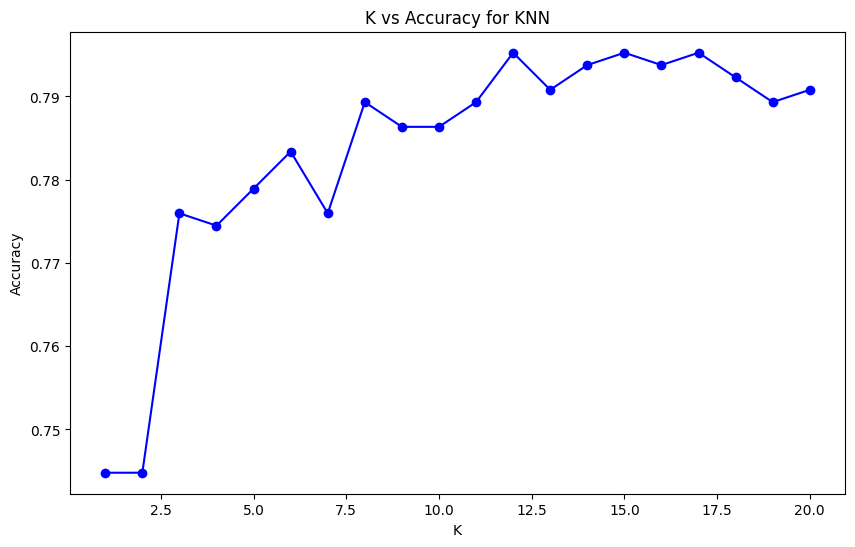

Best KNN Accuracy: 0.80


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class KNNClassifier():
    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X, K, epsilon=1e-3):
        N = len(X)
        y_hat = np.zeros(N, dtype=int)
        for i in range(N):
            dist2 = np.sum((self.X - X[i])**2, axis=1)
            idxt = np.argsort(dist2)[:K]
            gamma_k = 1 / (np.sqrt(dist2[idxt]) + epsilon)
            y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()
        return y_hat

#Accuracy calculation
def calculate_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

labels = [1, 2, 3]

# Finding the best K value
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNNClassifier()
    knn.fit(X_train_knn, y_train_knn)
    y_pred = knn.predict(X_test_knn, k)
    accuracies.append(calculate_accuracy(y_test_knn, y_pred))

best_k = k_values[np.argmax(accuracies)]
print(f"Best K value: {best_k}")

# Plot K vs Accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, 'bo-')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy for KNN')
plt.show()

# Train and evaluate the best model
knn_best = KNNClassifier()
knn_best.fit(X_train_knn, y_train_knn)
y_pred_best = knn_best.predict(X_test_knn, best_k)

accuracy_best_knn = calculate_accuracy(y_test_knn, y_pred_best)
print(f"Best KNN Accuracy: {accuracy_best_knn:.2f}")

In [39]:
# Add predictions
data_final['predicted_tax_zone'] = tax_zone_predictions

NameError: name 'tax_zone_predictions' is not defined

In [ ]:
# # Extract features and target for regression
# X_filtered = filtered_data[['taxes', 'fireplaces', 'sqrt_ft', 'sold_price', 'lot_acres', 'garage', 'HOA', 'zipcode', 'bedrooms', 'year_built', 'latitude', 'longitude']].values
# X_filtered = filtered_data[lr_features].values
# y_filtered = filtered_data['taxes'].values

**Linear regression **

In [ ]:
# data_lr=data_final.drop(columns=['predicted_tax_zone', 'tax_category', 'bathrooms'])

In [41]:
X_lr= data_final.drop(columns=['tax_category', 'taxes', 'bathrooms'])
y_lr= data_final['taxes']

# Splitting the datasets
limit = int(len(data_final) * 0.8)
X_train_lr, X_test_lr = X_lr[:limit], X_lr[limit:]
y_train_lr, y_test_lr = y_lr[:limit], y_lr[limit:]


In [36]:
class MVLinearRegression:
    def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):
        # Initialize weights and cost array
        epochs = int(epochs)
        N, D = X.shape
        self.w = np.random.randn(D)
        cost_history = np.zeros(epochs)

        # Gradient Descent Optimization
        for epoch in range(epochs):
            y_hat = self.predict(X)  # Prediction using current weights

            # Calculate the cost (Mean Squared Error)
            cost_history[epoch] = np.mean((y - y_hat) ** 2)

            # Weight Update Rule (Gradient Descent Step)
            gradient = (1 / N) * (X.T @ (y_hat - y))
            self.w -= eta * gradient  # Update weights using learning rate

        # Plot the training curve if requested
        if show_curve:
            plt.plot(cost_history)
            plt.xlabel("Epochs")
            plt.ylabel("Cost (MSE)")
            plt.title("Training Curve")
            plt.show()

    def predict(self, X):
        # Prediction: y_hat = X * w
        return X @ self.w

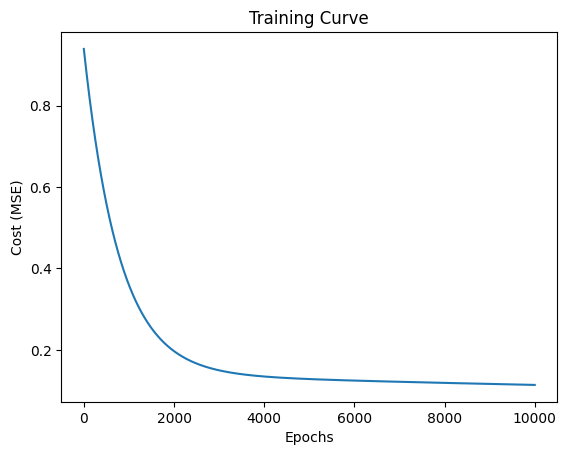

In [42]:
my_reg=MVLinearRegression()
my_reg.fit(X_train_lr, y_train_lr, eta=0.0002, epochs=10000, show_curve=True)

In [43]:
y_pred = my_reg.predict(X_test_lr)

In [ ]:
def evaluate_performance(y_test_lr, y_pred):
    """
    Function to calculate performance metrics: R2, MAPE, MAE.
    """

    # Calculate R-squared (R2)
    ss_res = np.sum((y_test_lr - y_pred) ** 2)
    ss_tot = np.sum((y_test_lr - np.mean(y_test_lr)) ** 2)
    r2 = 1 - (ss_res / ss_tot)

    # Calculate Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y_test_lr - y_pred) / y_test_lr)) * 100

    # Calculate Mean Absolute Error (MAE)
    mae = np.mean(np.abs(y_test_lr - y_pred))

    return {
        'R2': r2,
        'MAPE': mape,
        'MAE': mae
    }

# Example usage:
metrics = evaluate_performance(y_test_lr, y_pred)
print(f"R2: {metrics['R2']:.4f}")
print(f"MAPE: {metrics['MAPE']:.2f}%")
print(f"MAE: {metrics['MAE']:.4f}")

## Multivariate regresson

In [ ]:
data_final.columns

Index(['sold_price', 'taxes', 'longitude', 'latitude', 'lot_acres',
       'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage', 'zipcode',
       'fireplaces', 'HOA', 'tax_category'],
      dtype='object')

In [45]:
X_MVLR=data_final.drop(columns=['tax_category','taxes'])
y_MVLR=data_final['taxes']

In [ ]:
X_MVLR.columns

Index(['sold_price', 'longitude', 'latitude', 'lot_acres', 'year_built',
       'bedrooms', 'bathrooms', 'sqrt_ft', 'garage', 'fireplaces', 'HOA'],
      dtype='object')

In [46]:
limit= int(len(data_final)*0.8)
X_MVLR=data_final.drop(columns=['tax_category','taxes', 'zipcode'])
y_MVLR=data_final['taxes']
X_train_MVLR, X_test_MVLR = X_MVLR[:limit], X_MVLR[limit:]
y_train_MVLR, y_test_MVLR = y_MVLR[:limit], y_MVLR[limit:]

len(X_train_MVLR), len(X_test_MVLR), len(y_train_MVLR), len(y_test_MVLR)

(2693, 674, 2693, 674)

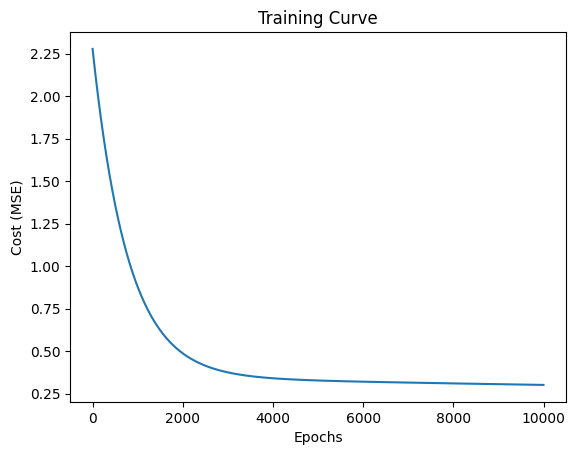

In [47]:
my_reg=MVLinearRegression()
my_reg.fit(X_train_MVLR,y_train_MVLR, eta=0.0002, epochs=10000, show_curve=True)

In [48]:
y_pred = my_reg.predict(X_test_MVLR)

In [ ]:
def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape_value = MAPE(y_test_MVLR, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape_value:.2f}%")

In [ ]:
# def OLS(Y, Y_hat, N):
#   return ((1/(2*N))*np.sum((Y-Y_hat)**2))
# ols_cost = OLS(y_MVLR, y_pred, len(y_MVLR))
# print(f"Ordinary Least Squares (OLS) cost: {ols_cost:.2f}")

In [ ]:
def MAE(Y, Y_hat):
    return np.mean(np.abs(Y - Y_hat))
mae_value = MAE(y_MVLR, y_pred)
print(f"Mean Absolute Error (MAE): {mae_value:.2f}")

In [ ]:
def RMSE(Y, Y_hat):
    mse = np.mean((Y - Y_hat) ** 2)
    return np.sqrt(mse)

# Calculate RMSE
rmse_value = RMSE(y_MVLR, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse_value:.2f}")


Root Mean Squared Error (RMSE): 0.38


**KNN regressor **

In [49]:
import numpy as np

class KNNRegressor():
    def fit(self, X, y):
        self.X = np.array(X)
        self.y = np.array(y)

    def predict(self, X, K, epsilon=1e-3):
        X = np.array(X)
        N = len(X)
        y_hat = np.zeros(N)


        dist2 = np.sum((self.X[:, np.newaxis] - X[np.newaxis, :])**2, axis=2)

        for i in range(N):

            idxt = np.argsort(dist2[:, i])[:K]


            if len(idxt) < K:
                raise ValueError("K is larger than the number of samples in the training set.")


            weights = np.exp(-dist2[idxt, i]) / (np.exp(-dist2[idxt, i]).sum() + epsilon)


            y_hat[i] = weights.dot(self.y[idxt])

        return y_hat
knnr = KNNRegressor()
knnr.fit(X_train_MVLR, y_train)


y_pred = knnr.predict(X_test_MVLR, K=20)

In [ ]:
def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Calculate RMSE
rmse_value = RMSE(y_test_MVLR, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse_value:.2f}")

Root Mean Squared Error (RMSE): 1.31


In [ ]:
def MAE(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Calculate MAE
mae_value = MAE(y_test_MVLR, y_pred)
print(f"Mean Absolute Error (MAE): {mae_value:.2f}")

Mean Absolute Error (MAE): 1.27


Testing

In [ ]:
features_gnb=['taxes', 'HOA', 'longitude', 'garage', 'latitude', 'fireplaces', 'lot_acres', 'sqrt_ft', 'sold_price']

In [ ]:
def scale_new_data(X_new, mean, std):
    std[std == 0] = 1
    X_new_scaled = (X_new - mean) / std
    return X_new_scaled

In [ ]:
X_train_scaled[5]

array([ 2.04428392,  0.95287373, -0.37867487,  0.35516973,  0.05408223,
        3.00981095,  0.12020075,  1.44435448,  3.0334248 ])

In [ ]:
XX= [[ 0.34900104, -1.64945309,  1.24529477, -1.41868994, -0.76949574,
       -0.92533695, -1.19349641, -0.85594318,  3.06796518]]
XX= scale_new_data(XX, mean, std)
XX

array([[ -1.19881951,  -7.41969924,   4.13268489, -13.52913696,
         -8.11605811,  -7.37113056,  -7.54209068,  -8.55182438,
         16.19381528]])

In [ ]:
predXX= gnb.predict(XX)
predXX

array([3])

In [ ]:
categories, bins = pd.qcut(df['taxes'], q=3, labels=['low', 'medium', 'high'], retbins=True)

tax_category = pd.DataFrame({
    'Category': ['low', 'medium', 'high'],
    'Min Value': bins[:-1],
    'Max Value': bins[1:],
    'Predicted category': [1, 2, 3]
})

print(tax_category)

  Category    Min Value     Max Value  Predicted category
0      low     0.000000  5.318340e+03                   1
1   medium  5318.340000  7.301247e+03                   2
2     high  7301.246667  1.221508e+07                   3


In [ ]:
XX = [[ 2.04428392,  0.95287373, -0.37867487,  0.35516973,  0.05408223,
        3.00981095,  0.12020075,  1.44435448,  3.0334248 ]]

XX_scaled = scale_new_data(XX, mean, std)


XX_selected = XX_scaled[:, selected_indices]


predXX = gnb.predict(XX_selected)
print(predXX)


[3]
